In [69]:
import pandas as pd
import numpy as np
import os
import time
import cv2
import matplotlib.pyplot as plt

In [70]:
from tqdm import tqdm

In [71]:
FOLDER = '../../../data_handson/kuzushiji/'
IMAGES = FOLDER + 'train_images/'
print(os.listdir(FOLDER))

['.DS_Store', 'unicode_translation.csv', 'image', 'train.csv', 'train_images', 'sample_submission.csv']


In [72]:
df_train = pd.read_csv(FOLDER + 'train.csv')
df_sub = pd.read_csv(FOLDER + 'sample_submission.csv')
unicode_map = {codepoint: char for codepoint, char in pd.read_csv(FOLDER + 'unicode_translation.csv').values}

In [73]:
df_sub_idx = df_sub.set_index("image_id")
df_train_idx = df_train.set_index("image_id")
idx_train = df_train['image_id']

In [74]:
def label_reader(label):
    try:
        code_arr = np.array(label['labels'].split(' ')).reshape(-1, 5)
    except:
        return
    return code_arr

def cvtToPos(feat_map): # feat_map = [cx, cy, w, h] -> [x0, y0, x1, y1]
    left_upper_x = feat_map[0] - int(feat_map[2]/2)
    left_upper_y = feat_map[1] - int(feat_map[3]/2)
    right_lower_x = feat_map[0] + int(feat_map[2]/2)
    right_lower_y = feat_map[1] + int(feat_map[3]/2)
    return np.array([left_upper_x, left_upper_y, right_lower_x, right_lower_y])

In [75]:
i= 101
j = 10

fname = idx_train[i]
image_path = IMAGES + fname + '.jpg'
code = label_reader(df_train_idx.loc[idx_train[i]])[j]
charactor = unicode_map[code[0]]

In [63]:
df_code = pd.DataFrame()
for idx in tqdm(idx_train):
    df_code_temp = pd.DataFrame(label_reader(df_train_idx.loc[idx]))
    df_code_temp['image_id'] = idx
    df_code = pd.concat([df_code, df_code_temp], axis=0, sort=False)

 16%|█▌        | 608/3881 [00:04<00:40, 80.27it/s] 


KeyboardInterrupt: 

In [66]:
df_code.columns = ['char', 'x', 'y', 'w', 'h', 'image_id']
df_code[['x', 'y', 'w', 'h']] = df_code[['x', 'y', 'w', 'h']].astype('int32') 

In [68]:
df_code.dtypes

char        object
x            int32
y            int32
w            int32
h            int32
image_id    object
dtype: object

In [88]:
coord[0]

array([1231, 3465,  133,   53], dtype=int32)

In [186]:
coord = df_code.query('image_id == "{}"'.format(idx_train[0]))[['x', 'y','w','h']].values
coord_center = np.vstack([coord[:, 0] + coord[:, 2] //2, coord[:, 1] + coord[:, 3] //2]).T

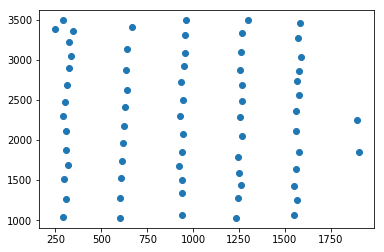

In [187]:
plt.scatter(coord_center[:,0], coord_center[:,1])
plt.show()

In [200]:
from sklearn.cluster import KMeans


In [202]:
df_center.head()

,0,1,col_n
0,1297,3491,4
1,317,1686,1
2,1566,1252,2
3,246,3376,1
4,941,1498,0


In [205]:
temp[0]

57    1904
64    1892
Name: 0, dtype: int32

In [214]:
((temp[0] - temp[0].values.mean()) ** 2).mean()

36.0

228.06945865323485


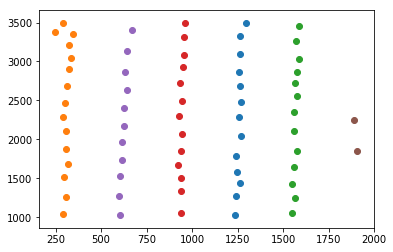

In [212]:
n = 6
km = KMeans(n_clusters=n)
X = coord_center.copy()
X[:, 1] = X[:, 1]/100
km_cluster = km.fit(X)

df_center = pd.DataFrame(coord_center)
df_center['col_n'] = km_cluster.labels_

cols = df_center['col_n'].unique()
mse = 0
for col in cols:
    temp = df_center.query('col_n == {}'.format(col))
    mse += ((temp[0] - temp[0].values.mean()) ** 2).mean()
    plt.scatter(temp[0], temp[1])
print(mse/n)
plt.show()

In [220]:
from sklearn.metrics import mean_squared_error

In [235]:
np.var(mean_y)

945.0838517976154

In [241]:
from sklearn.preprocessing import StandardScaler

2 - 0.24097590370520272
2 - 0.0016454326058144408


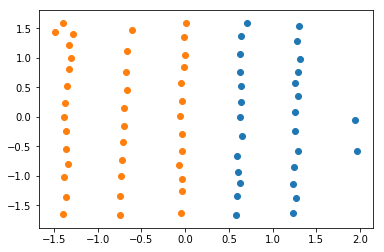

3 - 0.09171830827554671
3 - 0.0018343722504989993


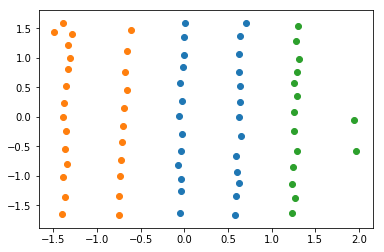

4 - 0.04211737791794949
4 - 0.009356047200503375


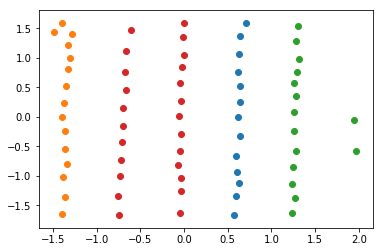

5 - 0.012083071265743137
5 - 0.009982153444524947


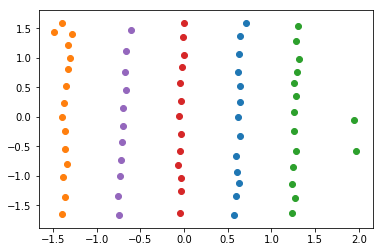

6 - 0.000991521878177712
6 - 0.0224283738705587


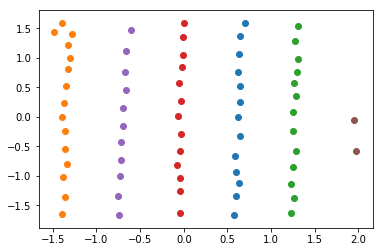

7 - 0.0008108117438123596
7 - 0.08987159635617649


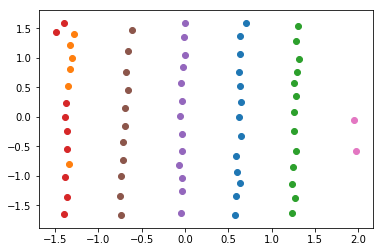

8 - 0.0006463773245494345
8 - 0.25521076141032106


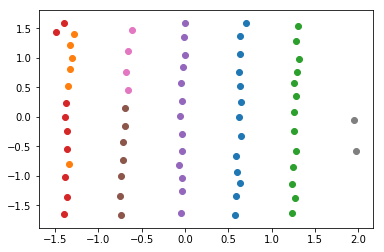

9 - 0.00044662100427777515
9 - 0.4961118407630967


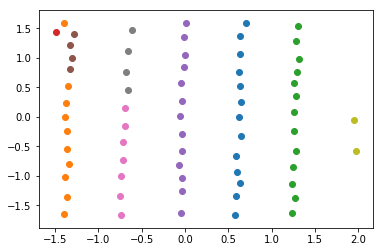

In [243]:
var_x_list = []
var_y_list = []
sc = StandardScaler()
for n in range(2, 10):
    km = KMeans(n_clusters=n)
    X = coord_center.copy()
    X[:, 1] = X[:, 1]/100
    km_cluster = km.fit(X)
    norm_coord_center = sc.fit_transform(coord_center)
    df_center = pd.DataFrame(norm_coord_center)
    df_center['col_n'] = km_cluster.labels_
    cols = df_center['col_n'].unique()
    var_x = []
    mean_y = []
    for col in cols:
        temp = df_center.query('col_n == {}'.format(col))
        var_x.append(np.var(temp[0]))
        mean_y.append(np.mean(temp[1]))
        plt.scatter(temp[0], temp[1])
    var_x_list.append(np.array(var_x).mean())
    var_y_list.append(np.var(mean_y))
    print(n,'-', np.array(var_x).mean())
    print(n,'-', np.var(mean_y))
    plt.show()

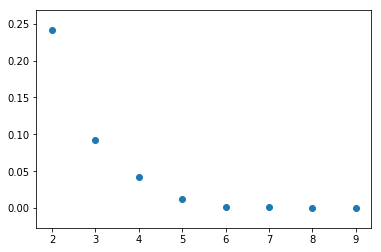

In [244]:
plt.scatter(range(2,10), var_x_list)
plt.show()

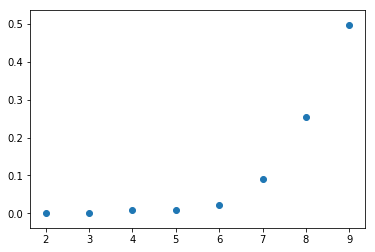

In [245]:
plt.scatter(range(2,10), var_y_list)
plt.show()

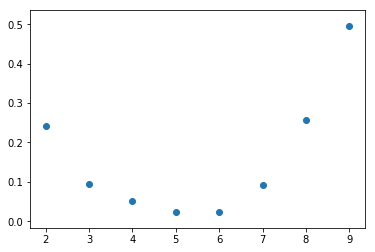

In [246]:
plt.scatter(range(2,10), np.array(var_y_list)+np.array(var_x_list))
plt.show()

In [248]:
np.array(var_y_list)+np.array(var_x_list)

array([0.24262134, 0.09355268, 0.05147343, 0.02206522, 0.0234199 ,
       0.09068241, 0.25585714, 0.49655846])

In [83]:
# print(charactor)
# img = cv2.imread(image_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# x, y, w, h = code[1:].astype("int")

# cv2.rectangle(img, (x, y), (x+w, y+h), color=(0,0, 255), thickness=2)

# plt.figure(figsize=(20,20))
# plt.imshow(img)

---------- U+306F  :  は ----------
---------- 100241706_00004_2 ----------


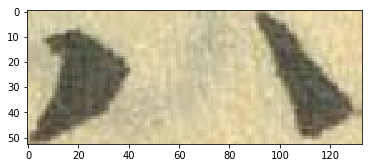

---------- 100241706_00005_1 ----------


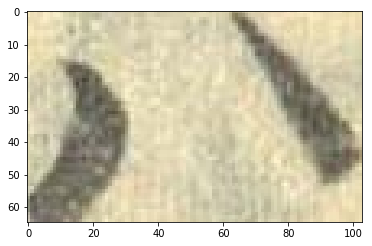

---------- 100241706_00005_2 ----------


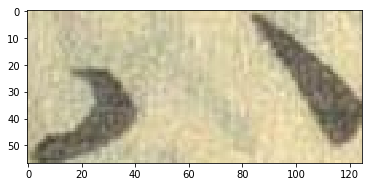

In [12]:
unicode_arr = df_char_train['unicode'].unique()
unicode = unicode_arr[0]

print('-'*10, unicode, ' : ',  unicode_map[unicode], '-'*10)

df_code_char0 = df_char_train.query('unicode == "{}"'.format(unicode))
images_char0 = df_code_char0['image_id'].unique()

cnt = 0
for n in range(3):
    fname = images_char0[n]
    print('-'*10, fname, '-'*10)

    image_path = IMAGES + fname + '.jpg'
    im_original = cv2.imread(image_path)
    im_original = cv2.cvtColor(im_original, cv2.COLOR_BGR2RGB)
    positions = df_code_char0.query('image_id == "{}"'.format(fname))[['x', 'y', 'w', 'h']].values.astype('int')

    for pos in positions:
        x, y, w, h = pos
        im = im_original[y:y+h, x:x+w]
        plt.imshow(im)
        
#         cv2.imwrite("{}_{}.jpg".format(unicode, cnt), im)
#         cnt += 1
        
        plt.show()

In [10]:
# np.random.seed(1337)

# for i in range(10):
#     img, labels = df_train.values[i]
#     viz = visualize_training_data(FOLDER + '/train_images/{}.jpg'.format(img), labels)
    
#     plt.figure(figsize=(15, 15))
#     plt.title(img)
#     plt.imshow(viz, interpolation='lanczos')
#     plt.show()